In [1]:
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python
import numpy as np
import matplotlib.pyplot as plt
from comparing_epsilons import run_experiment as run_experiment_eps


class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 8
    self.N = 1

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [5]:
def run_experiment(m1, m2, m3, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)
  
  for i in range(N):
    # optimistic initial values
    j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  #plt.figure(figsize=(12,8))  
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print (b.mean)

  return cumulative_average

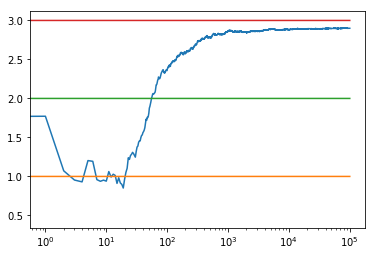

0.9980076218993094
2.006636726787969
2.9993732212440847


In [4]:
c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)

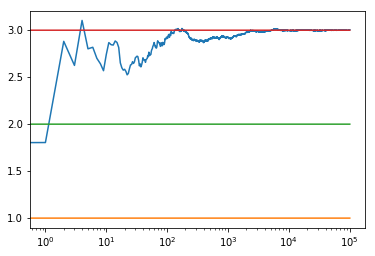

2.712615658239158
2.859806940807728
3.0038260482280474


In [6]:
oiv = run_experiment(1.0, 2.0, 3.0, 100000)

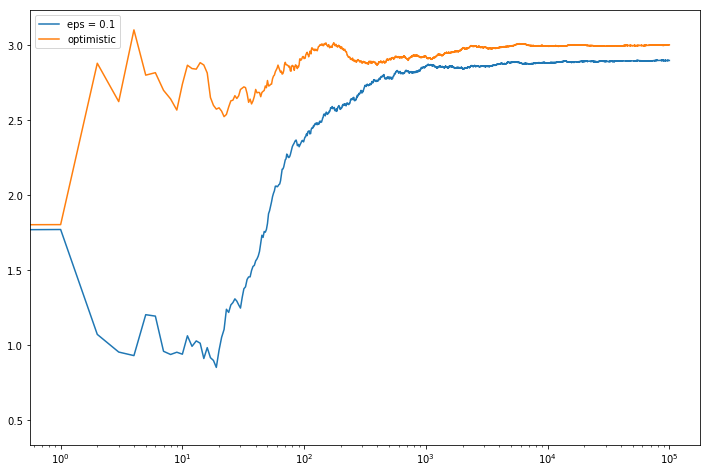

In [7]:
# log scale plot
plt.figure(figsize=(12,8))
plt.plot(c_1, label='eps = 0.1')
plt.plot(oiv, label='optimistic')
plt.legend()
plt.xscale('log')
plt.show()

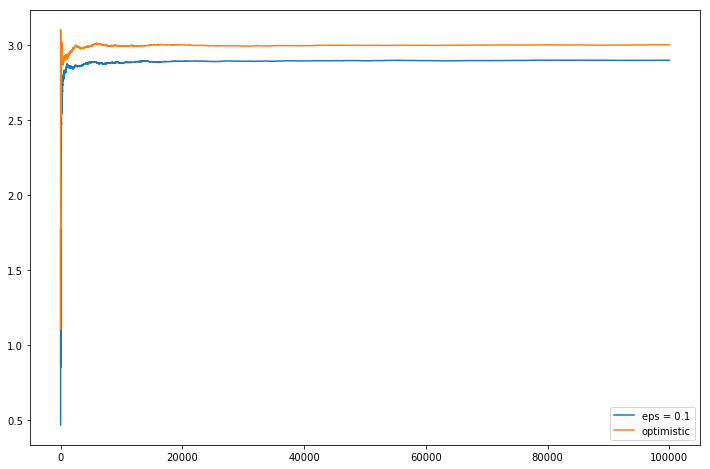

In [8]:
# log scale plot
plt.figure(figsize=(12,8))
plt.plot(c_1, label='eps = 0.1')
plt.plot(oiv, label='optimistic')
plt.legend()
plt.show()